# Análise de dados de teste
Objetivo
- Analisar a média e comparar a sua relevância estatística.
Considerando os algoritmos:
- Merge Sort Top-Down 3 subarrays (TD3)
- Merge Sort Top-Down 2 subarrays(TD2)
- Merge Sort Bottom UP (BU)

- {Hipóteses} 			
    - Hipótese nula (H0)é a hipótese de igualdade, logo afirma se que não há diferença de tempo de execução no caso médio entre os dois algoritmos.\\
    - Hipótese alternativa (H1):
        - {Teste 1} TD3 versus TD2.
            - \emph{H1} $\bar{x}_{TD2}$>$\bar{x}_{TD3}$, logo para o caso especificado há evidências que sugerem que o algoritmo TD3 melhor performance em tempo do que o TD2.
        - {Teste 2} TD3 versus BU.
            - \emph{H1} $\bar{x}_{BU}$>$\bar{x}_{TD3}$, logo para o caso especificado há evidências que sugerem que o algoritmo TD3 melhor performance em tempo do que o BU.
- {Teste de aderência} Kolmogorov-Smirnov. Seleção de distribuição teórica que melhor se adequa aos dados experimentais.
- {Análise de hipóteses} 

Passos

1. Visualização de dados
1. Análise Descritiva
1. Seleção de Distribuição
1. Teste de Hipóteses

In [6]:
import os
import sys
import numpy as np
import pandas as pd
from scipy.stats import t
from config import data_dir

## Visualização de dados

In [7]:
data = np.genfromtxt(os.path.join(data_dir,"raw","timeTest.csv"), delimiter=',')

In [8]:
databd=pd.read_csv(os.path.join(data_dir,"raw","timeTest.csv"),names=["TD3","TD2","BU"])

## Análise Descritiva

In [9]:
databd.describe()

,TD3,TD2,BU
count,500.000000,500.000000,500.000000
mean,106.486000,109.016000,97.220000
std,20.445191,20.169118,20.314057
min,47.000000,46.000000,31.000000
25%,94.000000,94.000000,87.000000
50%,106.000000,109.000000,94.000000
75%,120.000000,121.000000,109.000000
max,174.000000,177.000000,167.000000


In [10]:
import codecs
def exportPdFrameToLatex(path,file):
    with codecs.open(path,mode='w',encoding='utf-8') as outfile:
        outfile.write(file.to_latex(index=True,header=True,escape=True, float_format="%.2f"))

exportPdFrameToLatex(os.path.join(data_dir,"processed","tables","teststatistics.txt"),databd.describe())

In [11]:
td3_data=data[:,0]
td2_data=data[:,1]
bu_data=data[:,2]

In [12]:
td3_data

array([151.,  93., 106., 103., 113., 121., 102.,  95., 103.,  88., 125.,
        68.,  95., 114., 130.,  78., 121., 119., 115., 153., 117., 158.,
       120.,  86.,  96., 105., 104., 109.,  88.,  87., 111., 119., 118.,
        93., 154., 132.,  94., 103.,  80., 103., 105., 125., 103., 105.,
       126.,  74., 105.,  93., 132., 102.,  79., 103., 109., 123.,  74.,
       126., 104., 106., 126.,  71., 111.,  86., 148., 100., 141.,  85.,
       160., 110., 138., 125., 137., 104., 110., 120.,  85.,  63.,  89.,
       120., 126., 139., 105., 110.,  86., 105., 110.,  75., 110., 136.,
       119., 110.,  89., 137., 124., 108., 120.,  94.,  56., 139., 109.,
       105., 125.,  74., 106.,  79., 105., 106.,  79., 126., 110., 110.,
       104., 131.,  81.,  69.,  95.,  88., 137., 110., 105., 117.,  71.,
       165., 126., 111.,  58., 110., 120.,  51., 124., 104., 117., 110.,
       103.,  95., 102., 136., 133., 123.,  57., 110., 100., 101., 110.,
        70., 109.,  87., 105., 111.,  83.,  89., 12

- Distribuição

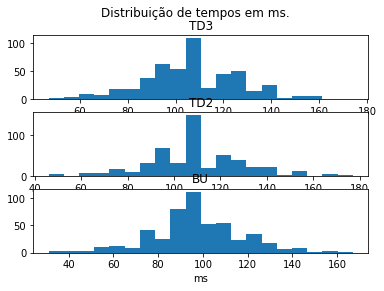

In [13]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3)
fig.suptitle('Distribuição de tempos em ms.')
bins=20
axs[0].hist(td3_data, bins=bins)
axs[0].set_title('TD3')

axs[1].hist(td2_data, bins=bins)
axs[1].set_title('TD2')

axs[2].hist(bu_data, bins=bins)
axs[2].set_title('BU')
axs[2].set_xlabel('ms')

plt.show()

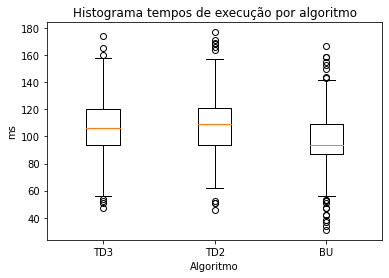

In [14]:
fig,ax=plt.subplots()
hist_tempos=ax.boxplot(data,labels=["TD3","TD2","BU"])
ax.set_ylabel("ms")
ax.set_xlabel("Algoritmo")
ax.set_title("Histograma tempos de execução por algoritmo")
path=os.path.join(data_dir, "processed", "images","hist_teste.jpg")
plt.savefig(path)
plt.show()

- Erro Máximo

In [15]:
def get_max_std_dev(a):
    _,cols=a.shape
    std_dev=np.zeros(cols)
    for j in range(0,cols):
        std_dev[j]=a[:,j].std()
    return np.max(std_dev)

max_std_dev=get_max_std_dev(data)
pc_max_std_dev=0.1
max_error_tol=max_std_dev*pc_max_std_dev
print("Erro máximo tolerado ms: ",max_error_tol)

Erro máximo tolerado ms:  2.04247351023214


## Teste de Hipóteses

# Seleção de Distribuições Kolmogorov-Smirnov

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

def print_kolmogorov_fit_exp_vs_dist(my_data,bins):
    my_data_proba=np.histogram(my_data,bins,density=True)[0]
    # list_of_dists = ['invgauss']

    list_of_dists = ['norm','beta','expon','exponnorm','exponweib','exponpow','f','fisk','foldnorm','gamma','invgamma','invgauss','invweibull','logistic','loggamma','loglaplace','lognorm','rayleigh','uniform','weibull_min','weibull_max','bradford', 'genextreme','triang']
    # %%capture --no-stdout
    results = []
    for i in list_of_dists:
        dist = getattr(stats, i)
        param = dist.fit(my_data)
        a = stats.kstest(my_data, i, args=param)
        results.append((i,a[0],a[1],param))
        # print(i,a[0],a[1],param)
        
    results.sort(key=lambda x:float(x[2]), reverse=True)
    for j in results:
        print("{}: statistic={}, pvalue={}".format(j[0], j[1], j[2]))
    return results

In [17]:
bins=10
resultstd3=print_kolmogorov_fit_exp_vs_dist(td3_data,bins)

C:\Users\Debs\anaconda3\envs\inpidata\lib\site-packages\scipy\stats\_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\Debs\anaconda3\envs\inpidata\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\Debs\anaconda3\envs\inpidata\lib\site-packages\scipy\stats\_continuous_distns.py:1678: RuntimeWarning: invalid value encountered in add
  logp = (np.log(a) + np.log(c) + sc.xlogy(a - 1.0, exm1c) +
C:\Users\Debs\anaconda3\envs\inpidata\lib\site-packages\scipy\stats\_distn_infrastructure.py:2494: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
C:\Users\Debs\anaconda3\envs\inpidata\lib\site-packages\scipy\stats\_distn_infrastructure.py:1797: RuntimeWarning: divide by zero encountered in

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
def plot_export_exp_vs_distribution(my_data,bins,distribution,params,path,title):
    fig, ax = plt.subplots(1, 1)
    # ax.hist(my_data, bins=bins, density=True, label='Experimental')
    ax.hist(my_data, density=True, histtype='stepfilled', bins=20, alpha=0.2, label='Experimental')

    dist = getattr(stats, distribution)
    bins_dist = np.linspace(np.min(my_data), np.max(my_data))
    ax.plot(bins_dist, dist.pdf(bins_dist, *params),
        'r-', lw=5, alpha=0.6, label=distribution)    
    ax.set_title(title)
    ax.set_xlabel('ms')
    ax.set_ylabel('p(x)')
    ax.legend()
    plt.savefig(path)
    plt.show()

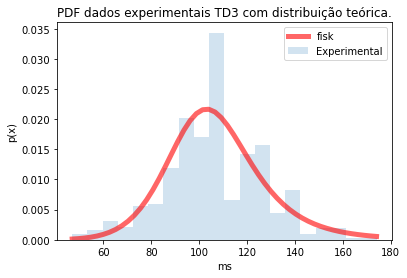

In [19]:
num=0
title="PDF dados experimentais TD3 com distribuição teórica."
path=os.path.join(data_dir, "processed", "images","disttd3.jpg")
plot_export_exp_vs_distribution(td3_data,10,resultstd3[num][0],resultstd3[num][3],path,title)

In [20]:
resultstd2=print_kolmogorov_fit_exp_vs_dist(td2_data,bins)

C:\Users\Debs\anaconda3\envs\inpidata\lib\site-packages\scipy\stats\_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\Debs\anaconda3\envs\inpidata\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\Debs\anaconda3\envs\inpidata\lib\site-packages\scipy\stats\_continuous_distns.py:1678: RuntimeWarning: invalid value encountered in add
  logp = (np.log(a) + np.log(c) + sc.xlogy(a - 1.0, exm1c) +
C:\Users\Debs\anaconda3\envs\inpidata\lib\site-packages\scipy\stats\_distn_infrastructure.py:2494: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
C:\Users\Debs\anaconda3\envs\inpidata\lib\site-packages\scipy\stats\_distn_infrastructure.py:1797: RuntimeWarning: divide by zero encountered in log
  retu

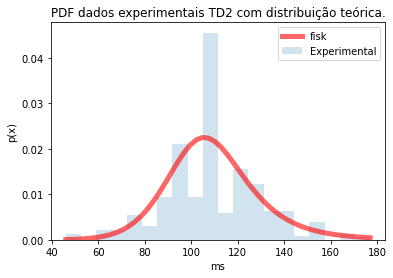

In [21]:
num=0
title="PDF dados experimentais TD2 com distribuição teórica."
path=os.path.join(data_dir, "processed", "images","disttd2.jpg")
plot_export_exp_vs_distribution(td2_data,10,resultstd2[num][0],resultstd2[num][3],path,title)

In [22]:
resultsbu=print_kolmogorov_fit_exp_vs_dist(bu_data,bins)

C:\Users\Debs\anaconda3\envs\inpidata\lib\site-packages\scipy\stats\_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\Debs\anaconda3\envs\inpidata\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\Debs\anaconda3\envs\inpidata\lib\site-packages\scipy\stats\_distn_infrastructure.py:2494: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
C:\Users\Debs\anaconda3\envs\inpidata\lib\site-packages\scipy\stats\_distn_infrastructure.py:1797: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))
C:\Users\Debs\anaconda3\envs\inpidata\lib\site-packages\scipy\stats\_continuous_distns.py:5003: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - 

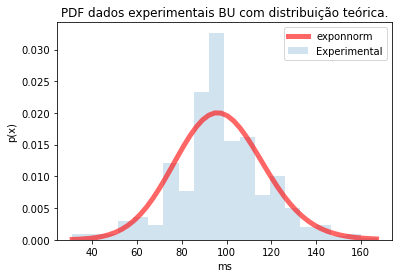

In [23]:
num=0
title="PDF dados experimentais BU com distribuição teórica."
path=os.path.join(data_dir, "processed", "images","distbu.jpg")
plot_export_exp_vs_distribution(bu_data,10,resultsbu[num][0],resultsbu[num][3],path,title)

# Verifica o teste de unilateral

(H0)é a hipótese de igualdade, logo afirma se que não há diferença de tempo de execução no caso médio entre os dois algoritmos.\\

Hipótese alternativa (H1) seria,neste contexto, que $\bar{x}$ do algoritmo TD3 é inferior aos algoritmos TD2 e/ou BU.\\

{Teste 1} TD3 versus TD2.
	$\bar{x}_{TD3}$<$\bar{x}_{TD2}$, logo para o caso especificado há evidências que sugerem que o algoritmo TD3 melhor performance em tempo do que o TD2.
	
{Teste 2} TD3 versus BU.
	$\bar{x}_{TD3}$<$\bar{x}_{BU}$, logo para o caso especificado há evidências que sugerem que o algoritmo TD3 melhor performance em tempo do que o BU.


Teste Unilateral à esquerda
p>alpha Aceita H0
p<= Rejeita H0

In [24]:
nivel_confianca=0.05
average_td3=np.mean(td3_data)

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

def calc_pval_unilateral_left(average,distribution,params):
    dist = getattr(stats, distribution)
    return dist.cdf(average,*params)

def calc_critical_z_unilateral_left(confidence_level,distribution,params):
    dist = getattr(stats, distribution)
    return dist.ppf(1-confidence_level,*params)

def accept_h0_unilateral_left(average,distribution,params,confidence_level):
    p_val=calc_pval_unilateral_left(average,distribution,params)
    # critical_z=calc_critical_z_unilateral_left(confidence_level,distribution,params)
    print("p-valor ",p_val," confidence_level",confidence_level)
    if p_val>confidence_level:
        print("p_val>confidence_level",f"{p_val}>{confidence_level},logo aceita H0" )
        return True
    else:
        print("p_val<=confidence_level",f"{p_val}<={confidence_level},logo rejeita H0" )
        return False

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

def calc_pval_unilateral_right(average,distribution,params):
    dist = getattr(stats, distribution)
    return 1-dist.cdf(average,*params)

def calc_critical_z_unilateral_right(confidence_level,distribution,params):
    dist = getattr(stats, distribution)
    return dist.ppf(1-confidence_level,*params)

def accept_h0_unilateral_right(average,distribution,params,confidence_level):
    p_val=calc_pval_unilateral_right(average,distribution,params)
    print("p-valor ",p_val," confidence_level",confidence_level)
    if p_val>confidence_level:
        print("p_val>confidence_level",f"{p_val}>{confidence_level},logo aceita H0" )
        return True
    else:
        print("p_val<=confidence_level",f"{p_val}<={confidence_level},logo rejeita H0" )
        return False

- {Teste 1} TD3 versus TD2.

In [32]:
accept_h0_unilateral_right(average_td3,resultstd2[0][0],resultstd2[0][3],nivel_confianca)

p-valor  0.5321317486400243  confidence_level 0.05
p_val>confidence_level 0.5321317486400243>0.05,logo aceita H0


True

- {Teste 2} TD3 versus BU.

In [33]:
accept_h0_unilateral_right(average_td3,resultsbu[0][0],resultsbu[0][3],nivel_confianca)

p-valor  0.31437841358620067  confidence_level 0.05
p_val>confidence_level 0.31437841358620067>0.05,logo aceita H0


True